## Introduction to Data Project Phase 2
__Parham Javan 810800008<br>__
__Yaser Azad 810800003__

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from scipy import stats

from scipy.stats import norm

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
from torch.autograd import Variable
from tqdm import tqdm

RANDOM_SEED = 0
MAX_TIME_STEP = 30

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [6]:
df = pd.read_csv('Preprocessed Data/final_dataframe_with_PCA.csv', sep=',')


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6384 entries, 0 to 6383
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bResult     6384 non-null   int64  
 1   gamelength  6384 non-null   int64  
 2   PC1         6384 non-null   float64
 3   PC2         6384 non-null   float64
 4   PC3         6384 non-null   float64
 5   PC4         6384 non-null   float64
 6   PC5         6384 non-null   float64
 7   PC6         6384 non-null   float64
 8   PC7         6384 non-null   float64
 9   PC8         6384 non-null   float64
 10  PC9         6384 non-null   float64
 11  PC10        6384 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 598.6 KB
None


# Part 6: Feature Analysis

## Method Two: Logistic Regression for outcome

Accuracy: 0.8159749412685983
Precision: 0.8335766423357664
Recall: 0.8251445086705202
F1-score: 0.8293391430646333


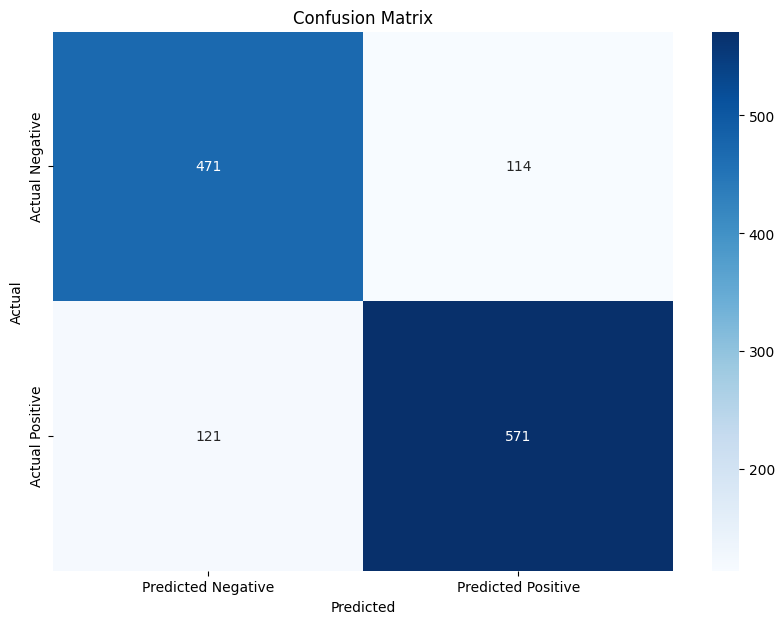

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Selecting all columns except the first two for X (features)
X = df.iloc[:, 2:]  # iloc[:, 2:] selects all rows and columns from index 2 onwards
y = df['bResult'].values  # target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if necessary
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
